# BTC - Facebook Prophet

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import _pickle as pickle

from fbprophet import Prophet as proph

### Loading in the Data

In [2]:
with open("curr_bitcoin.pickle",'rb') as fp:
    ts = pickle.load(fp)

### Formatting the data for Facebook Prophet

In [3]:
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

ts.head()

,ds,y
0,2017-01-01,995.440002
1,2017-01-02,1017.049988
2,2017-01-03,1033.300049
3,2017-01-04,1135.410034
4,2017-01-05,989.349976


#### Plotting

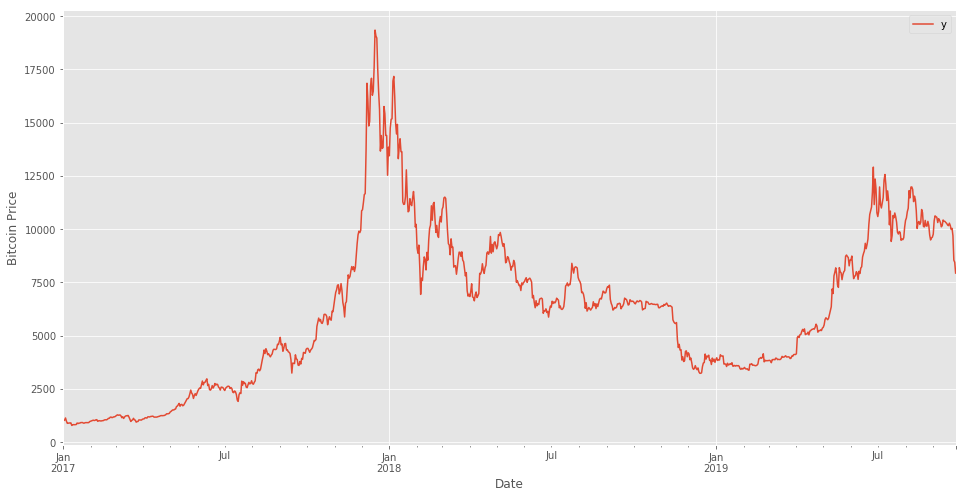

In [4]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_ylabel('Bitcoin Price')
ax.set_xlabel('Date')

plt.show()

### Modeling

In [5]:
# Fitting and training
mod = proph(interval_width=0.95)
mod.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Creating future dates to forecast

In [6]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
1024,2019-10-22
1025,2019-10-23
1026,2019-10-24
1027,2019-10-25
1028,2019-10-26


#### Forecasting future values

In [7]:
# Making predictions
forecast = mod.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1024,2019-10-22,13426.529950,11230.521604,15556.067398,13073.006208,13765.663926,-56.780055,-56.780055,-56.780055,-9.705904,-9.705904,-9.705904,-47.074151,-47.074151,-47.074151,0.0,0.0,0.0,13369.749895
1025,2019-10-23,13464.816732,11228.470609,15557.780822,13092.609796,13822.528647,-19.827599,-19.827599,-19.827599,-15.840328,-15.840328,-15.840328,-3.987271,-3.987271,-3.987271,0.0,0.0,0.0,13444.989133
1026,2019-10-24,13503.103514,11350.928631,15837.016573,13111.056576,13876.456549,-5.488892,-5.488892,-5.488892,-40.385119,-40.385119,-40.385119,34.896228,34.896228,34.896228,0.0,0.0,0.0,13497.614622
1027,2019-10-25,13541.390296,11629.524726,15669.706178,13113.968539,13942.419261,77.735934,77.735934,77.735934,8.777916,8.777916,8.777916,68.958018,68.958018,68.958018,0.0,0.0,0.0,13619.126230
1028,2019-10-26,13579.677078,11611.517797,15950.098957,13125.231789,14002.384971,129.802920,129.802920,129.802920,32.185743,32.185743,32.185743,97.617178,97.617178,97.617178,0.0,0.0,0.0,13709.479998


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

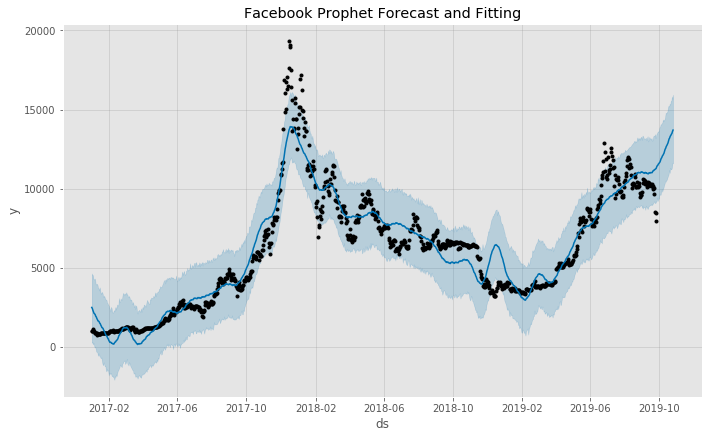

In [17]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.savefig('fb_fc_fit.png')
plt.show()

#### Graph above zoomed in

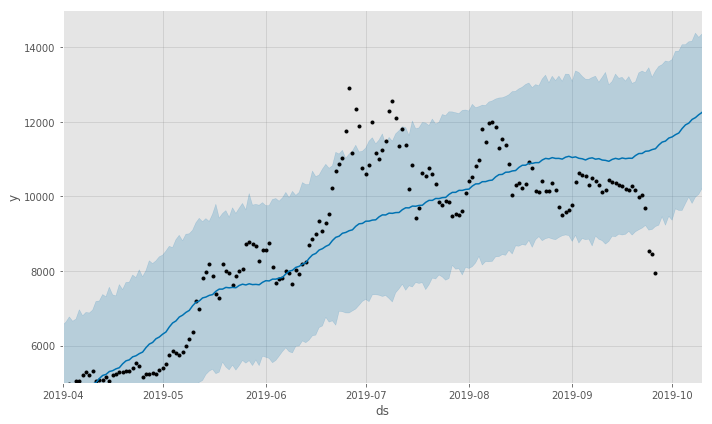

In [13]:
mod.plot(forecast, uncertainty=True)

plt.xlim(['2019-04-01', '2019-10-10'])
plt.ylim([5000, 15000])
plt.savefig('fb_zoom.png')
plt.show()

#### Plotted components of the forecasts

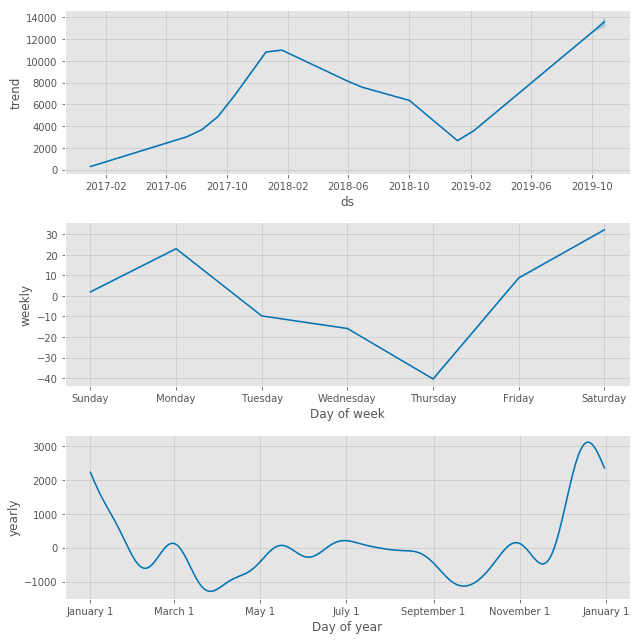

In [10]:
mod.plot_components(forecast)
plt.show()